In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Importing data from dataset
df = pd.read_csv('data_retail.csv', sep=';')

# Mendrop data yang tidak diperlukan
df = df.drop(['no'], axis=1)
df = df.drop(['Row_Num'],axis=1)

# Printing top 5 data :
print(df.head())

# printing info data :
print(df.info())


   Customer_ID Product  First_Transaction  Last_Transaction  \
0        29531   Jaket      1466304274396     1538718482608   
1        29531  Sepatu      1406077331494     1545735761270   
2       141526     Tas      1493349147000     1548322802000   
3       141526   Jaket      1493362372547     1547643603911   
4        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Customer_ID                 100000 non-null  int64 
 1   Product                     10

In [64]:
# Data cleansing
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  


In [65]:
# Preparasi Churn Customers; cross check transaksi data terakhir
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000013


In [66]:
# Klasifikasi customer berstatus churn atau tidak
df.loc[df['Last_Transaction']<='2018-08-01','is_churn']=True
df.loc[df['Last_Transaction']>'2018-08-01','is_churn']=False

print(df.head())
print(df.info())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (t

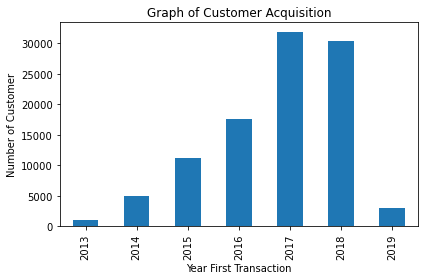

In [67]:
# Visualisasi distribusi transaksi pertama terhadap tahun
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

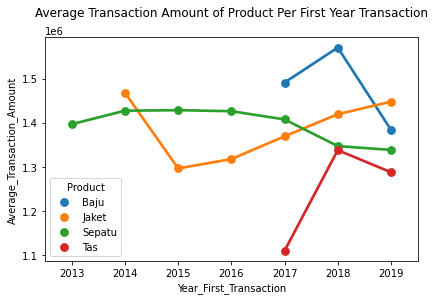

In [121]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
x='Year_First_Transaction',
y='Average_Transaction_Amount',hue='Product')
plt.tight_layout()
plt.title("Average Transaction Amount of Product Per First Year Transaction\n")
plt.show()

<Figure size 432x288 with 0 Axes>

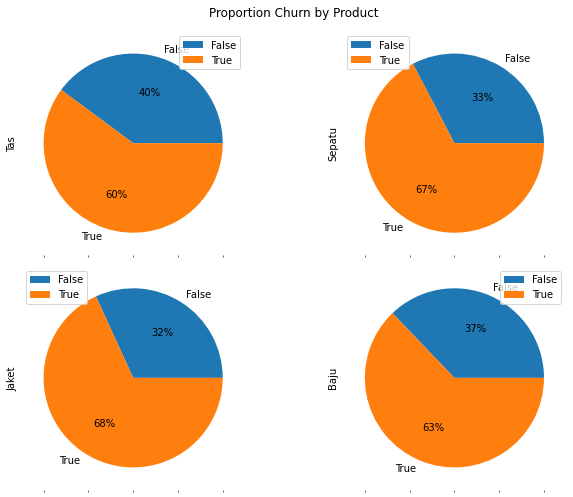

In [69]:
import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',columns='Product',values='Customer_ID',aggfunc='count',fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
figsize=(10, 7),
layout=(-1, 2),
autopct='%1.0f%%',
title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

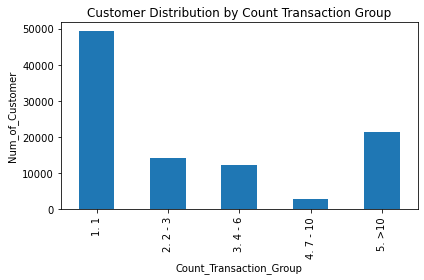

In [70]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

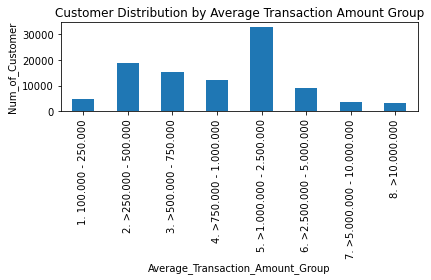

In [71]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [115]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]
X = X.astype(int)
# Target variable
y = df['is_churn']
y= np.multiply(y,1)
y = y.astype(int)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred=logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)


<Figure size 432x288 with 0 Axes>

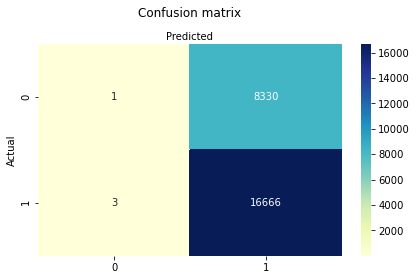

In [118]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
